In [24]:
#find all conf_ids that are NOT in cs_mdfps_schema.confid_data;
import psycopg2
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=scotland")
cur = conn.cursor()
query = """

SELECT 
    e.molregno,
    c.conf_id,
    e.vp_log10_pa,
    m.mdfp,
    c.molblock,
    m.md_experiment_uuid,
    cd.confgen_uuid -- Add this column for confgen_uuid
FROM 
    cs_mdfps_schema.experimental_data e
JOIN 
    conformers c ON e.molregno = c.molregno
LEFT JOIN 
    cs_mdfps_schema.mdfp_experiment_data m ON c.conf_id = m.conf_id
LEFT JOIN 
    cs_mdfps_schema.confid_data cd ON c.conf_id = cd.conf_id; -- Join with confid_data for confgen_uuid


"""

cur.execute(query)
data = cur.fetchall()
import pandas as pd

df = pd.DataFrame(data, columns=['molregno', 'conf_id', 'vp_log10_pa', 'mdfp', 'molblock', 'md_experiment_uuid', 'confgen_uuid'])
df

df_liquid = df[df['md_experiment_uuid'] == '24e3946b-fb2c-47bf-9965-1682bb0d63c9']
df_liquid = df_liquid.dropna(subset=['mdfp'])

df_gas = df[df['md_experiment_uuid'] == '5166be97-ef21-4cc5-bee1-719c7b9e3397']
df_gas = df_gas.dropna(subset=['mdfp'])


In [25]:
#combine on molregno
df_combined = pd.merge(df_liquid, df_gas, on='molregno', suffixes=('_liquid', '_gas'))
df_combined

,molregno,conf_id_liquid,vp_log10_pa_liquid,mdfp_liquid,molblock_liquid,md_experiment_uuid_liquid,confgen_uuid_liquid,conf_id_gas,vp_log10_pa_gas,mdfp_gas,molblock_gas,md_experiment_uuid_gas,confgen_uuid_gas
0,2414,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, -110...",[H]c1c(C([H])([H])[H])nc(N([H])c2c([H])c([H])c...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, 427....",[H]c1c(C([H])([H])[H])nc(N([H])c2c([H])c([H])c...,5166be97-ef21-4cc5-bee1-719c7b9e3397,906589dd-76fa-4d7b-aa9f-1ee90abe3835
1,2422,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 226.3...",[H]c1nc([H])c(C([H])([H])[H])nc1[H]\n RDKi...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, -4.31...",[H]c1nc([H])c(C([H])([H])[H])nc1[H]\n RDKi...,5166be97-ef21-4cc5-bee1-719c7b9e3397,906589dd-76fa-4d7b-aa9f-1ee90abe3835
2,2399,2397,-3.979000,"{'mdfp': '[19, 1, 0, 0, 0, 0, 0, 7, 0, 0, -18....",[H]c1c(Cl)c(Cl)c(Cl)c(-c2c([H])c(Cl)c(Cl)c(Cl)...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2397,-3.979000,"{'mdfp': '[19, 1, 0, 0, 0, 0, 0, 7, 0, 0, 16.3...",[H]c1c(Cl)c(Cl)c(Cl)c(-c2c([H])c(Cl)c(Cl)c(Cl)...,5166be97-ef21-4cc5-bee1-719c7b9e3397,906589dd-76fa-4d7b-aa9f-1ee90abe3835
3,44,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.332...",[H]C([H])([H])SC([H])([H])C([H])([H])C([H])([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.963...",[H]C([H])([H])SC([H])([H])C([H])([H])C([H])([H...,5166be97-ef21-4cc5-bee1-719c7b9e3397,906589dd-76fa-4d7b-aa9f-1ee90abe3835
4,75,1218,3.931102,"{'mdfp': '[6, 2, 1, 3, 0, 0, 0, 0, 0, 0, -31.8...",[H]C([H])([H])C([H])([H])O[N+](=O)[O-]\n R...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1218,3.931102,"{'mdfp': '[6, 2, 1, 3, 0, 0, 0, 0, 0, 0, -4.18...",[H]C([H])([H])C([H])([H])O[N+](=O)[O-]\n R...,5166be97-ef21-4cc5-bee1-719c7b9e3397,906589dd-76fa-4d7b-aa9f-1ee90abe3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,17063,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 13....",[H]OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 61....",[H]OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(...,5166be97-ef21-4cc5-bee1-719c7b9e3397,2153b1f8-cb83-4974-86a3-249f49ab55b7
2789,16989,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11....",[H]c1c([H])c([H])c2c(c1[H])-c1c([H])c([H])c([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.0...",[H]c1c([H])c([H])c2c(c1[H])-c1c([H])c([H])c([H...,5166be97-ef21-4cc5-bee1-719c7b9e3397,2153b1f8-cb83-4974-86a3-249f49ab55b7
2790,3394,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.7...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -29.7...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,5166be97-ef21-4cc5-bee1-719c7b9e3397,2153b1f8-cb83-4974-86a3-249f49ab55b7
2791,17082,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0...",[H]c1c([H])c([H])c2c([H])c3c(c([H])c2c1[H])-c1...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18....",[H]c1c([H])c([H])c2c([H])c3c(c([H])c2c1[H])-c1...,5166be97-ef21-4cc5-bee1-719c7b9e3397,2153b1f8-cb83-4974-86a3-249f49ab55b7


In [26]:
import json
df_combined['mdfp_vec_liquid'] = df_combined['mdfp_liquid'].apply(lambda val: json.loads(val['mdfp']) if (val and 'mdfp' in val) else None)
mdfp_features_liquid = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
 'liquid_intra_crf_mean',
 'liquid_intra_crf_std',
 'liquid_intra_crf_median',
 'liquid_intra_lj_mean',
 'liquid_intra_lj_std',
 'liquid_intra_lj_median',
 'liquid_total_crf_mean',
 'liquid_total_crf_std',
 'liquid_total_crf_median',
 'liquid_total_lj_mean',
 'liquid_total_lj_std',
 'liquid_total_lj_median',
 'liquid_intra_ene_mean',
 'liquid_intra_ene_std',
 'liquid_intra_ene_median',
 'liquid_total_ene_mean',
 'liquid_total_ene_std',
 'liquid_total_ene_median',
 'liquid_rgyr_mean',
 'liquid_rgyr_std',
 'liquid_rgyr_median',
 'liquid_sasa_mean',
 'liquid_sasa_std',
 'liquid_sasa_median',
 'liquid_dipole_magnitude_mean',
 'liquid_dipole_magnitude_std',
 'liquid_dipole_magnitude_median']
# # Assuming 'mdfp_vec' is the column containing the lists
df_combined[mdfp_features_liquid] = pd.DataFrame(df_combined['mdfp_vec_liquid'].apply(lambda x: x if x is not None else pd.Series(dtype=float)).to_list(), index=df_combined.index)

df_combined['mdfp_vec_gas'] = df_combined['mdfp_gas'].apply(lambda val: json.loads(val['mdfp']) if (val and 'mdfp' in val) else None)
mdfp_features_vacuum = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
    'vacuum_intra_crf_mean',
    'vacuum_intra_crf_std',
    'vacuum_intra_crf_median',
    'vacuum_intra_lj_mean',
    'vacuum_intra_lj_std',
    'vacuum_intra_lj_median',

    'vacuum_intra_ene_mean',
    'vacuum_intra_ene_std',
    'vacuum_intra_ene_median',

    'vacuum_rgyr_mean',
    'vacuum_rgyr_std',
    'vacuum_rgyr_median',
    'vacuum_sasa_mean',
    'vacuum_sasa_std',
    'vacuum_sasa_median',
    'vacuum_dipole_magnitude_mean',
    'vacuum_dipole_magnitude_std',
    'vacuum_dipole_magnitude_median']

df_combined[mdfp_features_vacuum] = pd.DataFrame(df_combined['mdfp_vec_gas'].apply(lambda x: x if x is not None else pd.Series(dtype=float)).to_list(), index=df_combined.index)
df_combined

,molregno,conf_id_liquid,vp_log10_pa_liquid,mdfp_liquid,molblock_liquid,md_experiment_uuid_liquid,confgen_uuid_liquid,conf_id_gas,vp_log10_pa_gas,mdfp_gas,...,vacuum_intra_ene_median,vacuum_rgyr_mean,vacuum_rgyr_std,vacuum_rgyr_median,vacuum_sasa_mean,vacuum_sasa_std,vacuum_sasa_median,vacuum_dipole_magnitude_mean,vacuum_dipole_magnitude_std,vacuum_dipole_magnitude_median
0,2414,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, -110...",[H]c1c(C([H])([H])[H])nc(N([H])c2c([H])c([H])c...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, 427....",...,422.968962,0.338761,0.005201,0.337776,4.775216,0.026642,4.773292,0.039127,0.007015,0.038759
1,2422,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 226.3...",[H]c1nc([H])c(C([H])([H])[H])nc1[H]\n RDKi...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, -4.31...",...,-5.690812,0.173063,0.000542,0.173112,2.592853,0.010666,2.593512,0.009574,0.002096,0.009146
2,2399,2397,-3.979000,"{'mdfp': '[19, 1, 0, 0, 0, 0, 0, 7, 0, 0, -18....",[H]c1c(Cl)c(Cl)c(Cl)c(-c2c([H])c(Cl)c(Cl)c(Cl)...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2397,-3.979000,"{'mdfp': '[19, 1, 0, 0, 0, 0, 0, 7, 0, 0, 16.3...",...,2.771492,0.377765,0.001583,0.377813,4.986911,0.024073,4.987978,0.053527,0.002811,0.053421
3,44,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.332...",[H]C([H])([H])SC([H])([H])C([H])([H])C([H])([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.963...",...,4.557898,0.198599,0.006849,0.201411,2.779108,0.028787,2.784790,0.040301,0.003028,0.039866
4,75,1218,3.931102,"{'mdfp': '[6, 2, 1, 3, 0, 0, 0, 0, 0, 0, -31.8...",[H]C([H])([H])C([H])([H])O[N+](=O)[O-]\n R...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1218,3.931102,"{'mdfp': '[6, 2, 1, 3, 0, 0, 0, 0, 0, 0, -4.18...",...,-6.603951,0.201442,0.006727,0.203887,2.479110,0.028822,2.488490,0.077106,0.003138,0.077343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,17063,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 13....",[H]OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 61....",...,89.558797,0.320915,0.002583,0.320726,4.380507,0.021210,4.381206,0.079902,0.017360,0.079031
2789,16989,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11....",[H]c1c([H])c([H])c2c(c1[H])-c1c([H])c([H])c([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.0...",...,-13.855076,0.269189,0.000845,0.269175,3.873443,0.014851,3.873452,0.009443,0.003406,0.008997
2790,3394,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.7...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -29.7...",...,-31.971482,0.187821,0.001184,0.187884,3.004451,0.018537,3.003277,0.041060,0.005153,0.042894
2791,17082,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0...",[H]c1c([H])c([H])c2c([H])c3c(c([H])c2c1[H])-c1...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18....",...,-33.428670,0.333968,0.000990,0.334031,4.599836,0.014381,4.600411,0.030838,0.074320,0.009266


In [27]:
#print columns
print(df_combined.columns)

Index(['molregno', 'conf_id_liquid', 'vp_log10_pa_liquid', 'mdfp_liquid',
       'molblock_liquid', 'md_experiment_uuid_liquid', 'confgen_uuid_liquid',
       'conf_id_gas', 'vp_log10_pa_gas', 'mdfp_gas', 'molblock_gas',
       'md_experiment_uuid_gas', 'confgen_uuid_gas', 'mdfp_vec_liquid',
       'NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP',
       'NumS', 'NumCl', 'NumBr', 'NumI', 'liquid_intra_crf_mean',
       'liquid_intra_crf_std', 'liquid_intra_crf_median',
       'liquid_intra_lj_mean', 'liquid_intra_lj_std', 'liquid_intra_lj_median',
       'liquid_total_crf_mean', 'liquid_total_crf_std',
       'liquid_total_crf_median', 'liquid_total_lj_mean',
       'liquid_total_lj_std', 'liquid_total_lj_median',
       'liquid_intra_ene_mean', 'liquid_intra_ene_std',
       'liquid_intra_ene_median', 'liquid_total_ene_mean',
       'liquid_total_ene_std', 'liquid_total_ene_median', 'liquid_rgyr_mean',
       'liquid_rgyr_std', 'liquid_rgyr_median', 'liquid_sasa_me

In [28]:
df_test = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/OPERA_Naef_Stratified_Test.csv')
df_test_molregno = df_test['molregno'].tolist()
#remove these from df_combined
df_combined_train = df_combined[~df_combined['molregno'].isin(df_test_molregno)]
df_combined_train


,molregno,conf_id_liquid,vp_log10_pa_liquid,mdfp_liquid,molblock_liquid,md_experiment_uuid_liquid,confgen_uuid_liquid,conf_id_gas,vp_log10_pa_gas,mdfp_gas,...,vacuum_intra_ene_median,vacuum_rgyr_mean,vacuum_rgyr_std,vacuum_rgyr_median,vacuum_sasa_mean,vacuum_sasa_std,vacuum_sasa_median,vacuum_dipole_magnitude_mean,vacuum_dipole_magnitude_std,vacuum_dipole_magnitude_median
0,2414,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, -110...",[H]c1c(C([H])([H])[H])nc(N([H])c2c([H])c([H])c...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, 427....",...,422.968962,0.338761,0.005201,0.337776,4.775216,0.026642,4.773292,0.039127,0.007015,0.038759
1,2422,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 226.3...",[H]c1nc([H])c(C([H])([H])[H])nc1[H]\n RDKi...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, -4.31...",...,-5.690812,0.173063,0.000542,0.173112,2.592853,0.010666,2.593512,0.009574,0.002096,0.009146
3,44,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.332...",[H]C([H])([H])SC([H])([H])C([H])([H])C([H])([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.963...",...,4.557898,0.198599,0.006849,0.201411,2.779108,0.028787,2.784790,0.040301,0.003028,0.039866
5,105,1250,2.911701,"{'mdfp': '[8, 4, 0, 1, 0, 0, 0, 0, 0, 0, -28.1...",[H]C([H])([H])C([H])([H])C([H])([H])C(=O)C([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1250,2.911701,"{'mdfp': '[8, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0.152...",...,-1.260199,0.244215,0.009540,0.243719,3.371129,0.047660,3.374569,0.067538,0.002184,0.067382
6,79,1222,2.513502,"{'mdfp': '[7, 1, 0, 1, 0, 0, 0, 0, 0, 0, -28.2...",[H]OC([H])([H])C([H])([H])C(C([H])([H])[H])(C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1222,2.513502,"{'mdfp': '[7, 1, 0, 1, 0, 0, 0, 0, 0, 0, 55.53...",...,58.902177,0.201957,0.005621,0.204416,2.966364,0.033950,2.972837,0.041021,0.001998,0.041032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,17063,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 13....",[H]OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 61....",...,89.558797,0.320915,0.002583,0.320726,4.380507,0.021210,4.381206,0.079902,0.017360,0.079031
2789,16989,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11....",[H]c1c([H])c([H])c2c(c1[H])-c1c([H])c([H])c([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.0...",...,-13.855076,0.269189,0.000845,0.269175,3.873443,0.014851,3.873452,0.009443,0.003406,0.008997
2790,3394,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.7...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -29.7...",...,-31.971482,0.187821,0.001184,0.187884,3.004451,0.018537,3.003277,0.041060,0.005153,0.042894
2791,17082,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0...",[H]c1c([H])c([H])c2c([H])c3c(c([H])c2c1[H])-c1...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18....",...,-33.428670,0.333968,0.000990,0.334031,4.599836,0.014381,4.600411,0.030838,0.074320,0.009266


In [29]:
df_combined_train

,molregno,conf_id_liquid,vp_log10_pa_liquid,mdfp_liquid,molblock_liquid,md_experiment_uuid_liquid,confgen_uuid_liquid,conf_id_gas,vp_log10_pa_gas,mdfp_gas,...,vacuum_intra_ene_median,vacuum_rgyr_mean,vacuum_rgyr_std,vacuum_rgyr_median,vacuum_sasa_mean,vacuum_sasa_std,vacuum_sasa_median,vacuum_dipole_magnitude_mean,vacuum_dipole_magnitude_std,vacuum_dipole_magnitude_median
0,2414,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, -110...",[H]c1c(C([H])([H])[H])nc(N([H])c2c([H])c([H])c...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, 427....",...,422.968962,0.338761,0.005201,0.337776,4.775216,0.026642,4.773292,0.039127,0.007015,0.038759
1,2422,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 226.3...",[H]c1nc([H])c(C([H])([H])[H])nc1[H]\n RDKi...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, -4.31...",...,-5.690812,0.173063,0.000542,0.173112,2.592853,0.010666,2.593512,0.009574,0.002096,0.009146
3,44,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.332...",[H]C([H])([H])SC([H])([H])C([H])([H])C([H])([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.963...",...,4.557898,0.198599,0.006849,0.201411,2.779108,0.028787,2.784790,0.040301,0.003028,0.039866
5,105,1250,2.911701,"{'mdfp': '[8, 4, 0, 1, 0, 0, 0, 0, 0, 0, -28.1...",[H]C([H])([H])C([H])([H])C([H])([H])C(=O)C([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1250,2.911701,"{'mdfp': '[8, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0.152...",...,-1.260199,0.244215,0.009540,0.243719,3.371129,0.047660,3.374569,0.067538,0.002184,0.067382
6,79,1222,2.513502,"{'mdfp': '[7, 1, 0, 1, 0, 0, 0, 0, 0, 0, -28.2...",[H]OC([H])([H])C([H])([H])C(C([H])([H])[H])(C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1222,2.513502,"{'mdfp': '[7, 1, 0, 1, 0, 0, 0, 0, 0, 0, 55.53...",...,58.902177,0.201957,0.005621,0.204416,2.966364,0.033950,2.972837,0.041021,0.001998,0.041032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,17063,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 13....",[H]OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 61....",...,89.558797,0.320915,0.002583,0.320726,4.380507,0.021210,4.381206,0.079902,0.017360,0.079031
2789,16989,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11....",[H]c1c([H])c([H])c2c(c1[H])-c1c([H])c([H])c([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.0...",...,-13.855076,0.269189,0.000845,0.269175,3.873443,0.014851,3.873452,0.009443,0.003406,0.008997
2790,3394,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.7...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -29.7...",...,-31.971482,0.187821,0.001184,0.187884,3.004451,0.018537,3.003277,0.041060,0.005153,0.042894
2791,17082,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0...",[H]c1c([H])c([H])c2c([H])c3c(c([H])c2c1[H])-c1...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18....",...,-33.428670,0.333968,0.000990,0.334031,4.599836,0.014381,4.600411,0.030838,0.074320,0.009266


In [31]:
#rename conf_id_liquid to confid
df_combined_train = df_combined_train.rename(columns={'conf_id_liquid': 'confid'})

In [32]:
df_potential_energies = pd.read_csv('potential_energy_moments_liquid_vacuum_.csv')
df_potential_energies
#combine on confid
df_combined_train_potential_energies = pd.merge(df_combined_train, df_potential_energies, on='confid')
df_combined_train_potential_energies

,molregno,confid,vp_log10_pa_liquid,mdfp_liquid,molblock_liquid,md_experiment_uuid_liquid,confgen_uuid_liquid,conf_id_gas,vp_log10_pa_gas,mdfp_gas,...,vacuum_sasa_median,vacuum_dipole_magnitude_mean,vacuum_dipole_magnitude_std,vacuum_dipole_magnitude_median,mean_liquid,std_liquid,median_liquid,mean_vacuum,std_vacuum,median_vacuum
0,2414,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, -110...",[H]c1c(C([H])([H])[H])nc(N([H])c2c([H])c([H])c...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2412,-3.309299,"{'mdfp': '[17, 3, 3, 0, 0, 0, 0, 0, 0, 0, 427....",...,4.773292,0.039127,0.007015,0.038759,-248531.033642,325.695571,-248536.481742,-858.790061,14.278186,-859.670532
1,2422,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 226.3...",[H]c1nc([H])c(C([H])([H])[H])nc1[H]\n RDKi...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,2420,3.031002,"{'mdfp': '[7, 0, 2, 0, 0, 0, 0, 0, 0, 0, -4.31...",...,2.593512,0.009574,0.002096,0.009146,54424.133949,173.388665,54425.005853,268.962962,8.519794,267.914658
2,44,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.332...",[H]C([H])([H])SC([H])([H])C([H])([H])C([H])([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1187,3.830901,"{'mdfp': '[5, 2, 0, 0, 0, 0, 1, 0, 0, 0, 4.963...",...,2.784790,0.040301,0.003028,0.039866,2912.045392,192.944134,2914.195575,41.622845,10.166634,40.712049
3,105,1250,2.911701,"{'mdfp': '[8, 4, 0, 1, 0, 0, 0, 0, 0, 0, -28.1...",[H]C([H])([H])C([H])([H])C([H])([H])C(=O)C([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1250,2.911701,"{'mdfp': '[8, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0.152...",...,3.374569,0.067538,0.002184,0.067382,-292.664947,258.071392,-288.277223,48.516853,12.586784,47.594490
4,79,1222,2.513502,"{'mdfp': '[7, 1, 0, 1, 0, 0, 0, 0, 0, 0, -28.2...",[H]OC([H])([H])C([H])([H])C(C([H])([H])[H])(C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,906589dd-76fa-4d7b-aa9f-1ee90abe3835,1222,2.513502,"{'mdfp': '[7, 1, 0, 1, 0, 0, 0, 0, 0, 0, 55.53...",...,2.972837,0.041021,0.001998,0.041032,2705.151084,264.639847,2708.635167,71.587472,12.624610,70.508442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,17063,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 13....",[H]OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17061,1.171781,"{'mdfp': '[25, 6, 0, 2, 15, 0, 0, 0, 0, 0, 61....",...,4.381206,0.079902,0.017360,0.079031,24275.981600,406.441649,24203.256355,207.955689,12.220082,207.037994
2512,16989,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11....",[H]c1c([H])c([H])c2c(c1[H])-c1c([H])c([H])c([H...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,16987,-1.397999,"{'mdfp': '[14, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.0...",...,3.873452,0.009443,0.003406,0.008997,23380.174275,249.612898,23383.421406,171.194067,12.813954,170.275177
2513,3394,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.7...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -29.7...",...,3.003277,0.041060,0.005153,0.042894,5472.024418,267.865589,5472.292587,83.256478,12.449872,82.234009
2514,17082,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0...",[H]c1c([H])c([H])c2c([H])c3c(c([H])c2c1[H])-c1...,24e3946b-fb2c-47bf-9965-1682bb0d63c9,2153b1f8-cb83-4974-86a3-249f49ab55b7,17080,-6.890598,"{'mdfp': '[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, -18....",...,4.600411,0.030838,0.074320,0.009266,47927.004655,288.060385,47930.199510,299.541573,13.820196,298.661575


In [37]:
for i in range(10):
    df_train = df_combined_train_potential_energies.sample(frac=0.8, random_state=i)
    df_val = df_combined_train_potential_energies.drop(df_train.index)
    #save
    df_train.to_csv(f'train_{i}.csv')
    df_val.to_csv(f'val_{i}.csv')


In [38]:
#first experiment: XGBoost PhysicalChem Descriptors
import xgboost as xgb
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def XGBOOST_random_splits(params, descriptors):
    pred_list,ys_list,molregnos = [],[],[]
    for i in range(10):
        df_train = pd.read_csv(f'train_{i}.csv')
        df_val = pd.read_csv(f'val_{i}.csv')
        
        train_X = df_train[descriptors]
        train_y = df_train['vp_log10_pa_liquid']
        val_X = df_val[descriptors]
        val_y = df_val['vp_log10_pa_liquid']
        dtrain = xgb.DMatrix(train_X, label=train_y)
        dval = xgb.DMatrix(val_X, label=val_y)
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=999,
            verbose_eval=False
        )
        preds = model.predict(dval)
        rmse = mean_squared_error(val_y, preds, squared=False)
        pred_list.append(preds)
        ys_list.append(val_y)
        molregnos.append(df_val['molregno'])
        print(f"Split {i + 1}: RMSE = {rmse}")
    return pred_list, ys_list, molregnos
  

In [39]:
params = { #hyperparameters optimized by Working Wang
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
pred_list_xgboost_mdfp_plus_condensed_phase, ys_list_xgboost_mdfp_plus_condensed_phase,molregnos_xgboost_mdfp_plus_condensed_phase = XGBOOST_random_splits(params, mdfp_features_liquid)


Split 1: RMSE = 0.9534750370633185
Split 2: RMSE = 0.9602736599853599
Split 3: RMSE = 0.9886834106747918
Split 4: RMSE = 0.9639547417459509
Split 5: RMSE = 0.9365559481354736
Split 6: RMSE = 0.8543132868080877
Split 7: RMSE = 1.052709707697592
Split 8: RMSE = 0.9551096709069574
Split 9: RMSE = 0.89425559476051
Split 10: RMSE = 0.9074633492115245


In [40]:
pred_list_xgboost_mdfp_plus_vacuum, ys_list_xgboost_mdfp_plus_vacuum,molregnos_xgboost_mdfp_plus_vacuum = XGBOOST_random_splits(params, mdfp_features_vacuum)


Split 1: RMSE = 0.9587749081091377
Split 2: RMSE = 1.11214161568176
Split 3: RMSE = 1.1091967222256023
Split 4: RMSE = 1.005160111007635
Split 5: RMSE = 1.0557713467936947
Split 6: RMSE = 0.9193402545530058
Split 7: RMSE = 1.1140399399323473
Split 8: RMSE = 0.9740545749311257
Split 9: RMSE = 0.9697581861040916
Split 10: RMSE = 0.9748889613976969


In [41]:
features_combined = list(set(mdfp_features_liquid + mdfp_features_vacuum))
pred_list_xgboost_mdfp_plus_vacuum_condensed, ys_list_xgboost_mdfp_plus_vacuum_condensed,molregnos_xgboost_mdfp_plus_vacuum_condensed = XGBOOST_random_splits(params, features_combined)

Split 1: RMSE = 0.9293781716504173
Split 2: RMSE = 0.9924036427206346
Split 3: RMSE = 1.0187276704828636
Split 4: RMSE = 0.9324321836186484
Split 5: RMSE = 1.0071989644298078
Split 6: RMSE = 0.8689676212998727
Split 7: RMSE = 0.9692804863018589
Split 8: RMSE = 0.944475827719909
Split 9: RMSE = 0.8688907838063697
Split 10: RMSE = 0.8894490580352168


In [42]:
potential_energy_fnames = ['mean_liquid', 'std_liquid', 'median_liquid', 'mean_vacuum', 'std_vacuum', 'median_vacuum']
pred_list_xgboost_potential_energies, ys_list_xgboost_potential_energies,molregnos_xgboost_potential_energies = XGBOOST_random_splits(params, potential_energy_fnames)

Split 1: RMSE = 1.5615124056335616
Split 2: RMSE = 1.4142031236105113
Split 3: RMSE = 1.4628901455459216
Split 4: RMSE = 1.3479201567841748
Split 5: RMSE = 1.421715333153255
Split 6: RMSE = 1.2578050177538906
Split 7: RMSE = 1.5041030155285662
Split 8: RMSE = 1.471586655073584
Split 9: RMSE = 1.3051192267289151
Split 10: RMSE = 1.303937003117905


In [45]:
fnames_2d =  ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI']
pred_list_xgboost_potential_energies_2dcounts, ys_list_xgboost_potential_energies_2dcounts,molregnos_xgboost_potential_energies_2dcounts = XGBOOST_random_splits(params, potential_energy_fnames + fnames_2d)


Split 1: RMSE = 1.0338996906894702
Split 2: RMSE = 1.0559638428842348
Split 3: RMSE = 1.0891586465603706
Split 4: RMSE = 0.9691897022852407
Split 5: RMSE = 0.991081447724981
Split 6: RMSE = 0.8968195682795027
Split 7: RMSE = 1.0957683683489168
Split 8: RMSE = 0.9554920840505188
Split 9: RMSE = 1.000815637684799
Split 10: RMSE = 1.0353852721026835


In [47]:
pred_list_xgboost_2dcounts, ys_list_xgboost_2dcounts,molregnos_xgboost_2dcounts = XGBOOST_random_splits(params, fnames_2d)

Split 1: RMSE = 1.2981147649389844
Split 2: RMSE = 1.484694118510345
Split 3: RMSE = 1.6455435153747708
Split 4: RMSE = 1.312259622855468
Split 5: RMSE = 1.426560489559138
Split 6: RMSE = 1.304895996403193
Split 7: RMSE = 1.3731863341576869
Split 8: RMSE = 1.2438926471306362
Split 9: RMSE = 1.2769193590628842
Split 10: RMSE = 1.2884257971400592


In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import scipy.stats as stats

def getStatValues_v2(x,y,treshold=1):
    RMSE = mean_squared_error(np.array(x), np.array(y), squared=False)
    MAE = mean_absolute_error(np.array(x), np.array(y))
    EBO = np.mean(np.abs(np.array(x) - np.array(y)) < treshold)
    KT = stats.kendalltau(x, y)[0]
    median_AE = median_absolute_error(np.array(x), np.array(y))

    return RMSE, MAE, EBO, KT, median_AE

def density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, print_stats=True, bounds=None, title=None, print_spearman=False, name=None, dims = (1, 3)):
    # fig, axes = plt.subplots(1, len(reals_list), figsize=(10 * len(reals_list), 8))
    #assert that len(reals_list) is smaller then the number of subplots
    assert len(reals_list) <= dims[0]*dims[1]
    fig, axes = plt.subplots(dims[0], dims[1], figsize=(10 * dims[1], 8 * dims[0]))
    axes = axes.flatten()
    for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
        ax = axes[i] if len(reals_list) > 1 else axes


    # for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
    #     ax = axes[i] if len(reals_list) > 1 else axes

        rmses, maes, ebos, kts, median_aes = [], [], [], [], []

        for r, p in zip(reals, predictions):
            RMSE, MAE, EBO, KT, median_AE = getStatValues_v2(r, p)
            rmses.append(RMSE)
            maes.append(MAE)
            ebos.append(EBO)
            kts.append(KT)
            median_aes.append(median_AE)

        rmse_90_low, rmse_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(rmses), scale=stats.sem(rmses))
        rmse_mean = np.mean(rmses)
        mae_90_low, mae_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(maes), scale=stats.sem(maes))
        mae_mean = np.mean(maes)
        ebo_90_low, ebo_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(ebos), scale=stats.sem(ebos))
        ebo_mean = np.mean(ebos)
        kt_90_low, kt_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(kts), scale=stats.sem(kts))
        kt_mean = np.mean(kts)
        median_AE_90_low, median_AE_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(median_aes), scale=stats.sem(median_aes))
        median_AE_mean = np.mean(median_aes)

        mrn = [item for sublist in molregnos for item in sublist]
        real = [item for sublist in reals for item in sublist]
        prediction = [item for sublist in predictions for item in sublist]

        df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
        df = df.groupby('molregno').mean()
        real = df['real'].tolist()
        prediction = df['prediction'].tolist()

        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')

        dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
        z = dens_u.pdf([real, prediction])

        sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

        ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
        ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
        ax.grid(True, which="both")

        if bounds is None:
            lower = min(prediction + real) - 2
            upper = max(prediction + real) + 2
        else:
            lower = bounds[0]
            upper = bounds[1]

        ax.axis([lower, upper, lower, upper])

        text_box = ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMedian AE: {median_AE_mean:.2f} ({median_AE_90_low:.2f}-{median_AE_90_high:.2f})\nMean AE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})',
                           transform=ax.transAxes, fontsize=12, verticalalignment='top',
                           bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        if title is not None:
            ax.set_title(title[i] if len(reals_list) > 1 else title, fontsize=14)

        ax.set_aspect('equal', 'box')

    if name:
        plt.savefig(f'{name}.png', dpi=800, bbox_inches='tight')
    else:
        plt.show()


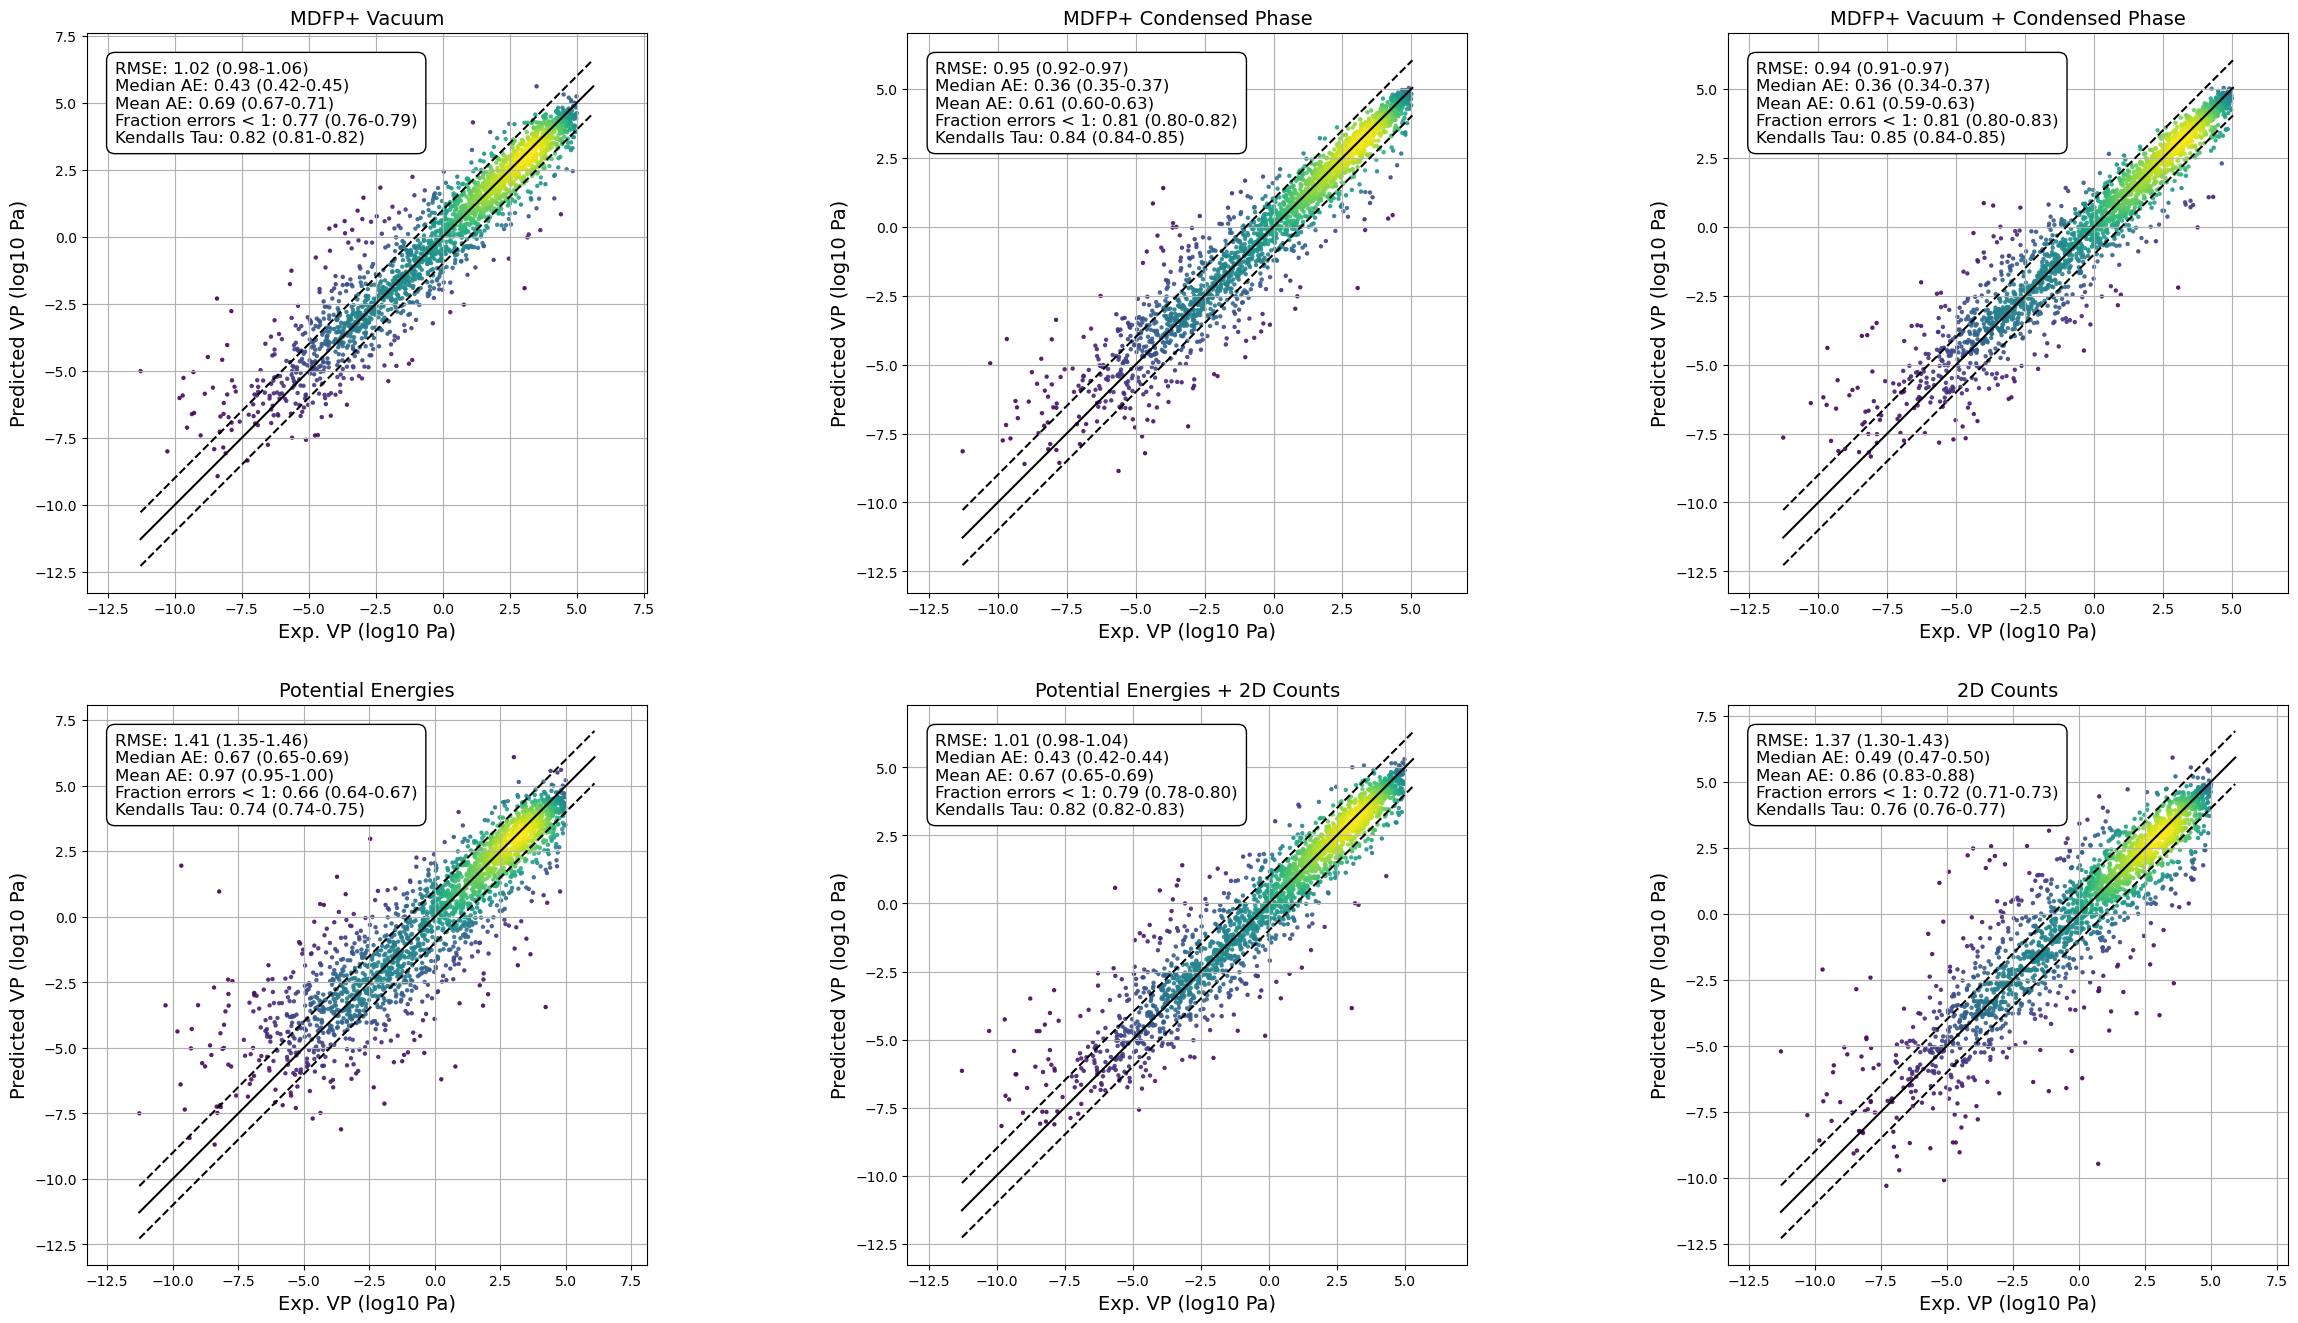

In [48]:

# reals_list = [ys_list_xgboost_mdfp_plus_vacuum, ys_list_xgboost_mdfp_plus_condensed_phase, ys_list_xgboost_mdfp_plus_vacuum_condensed]
# predictions_list = [pred_list_xgboost_mdfp_plus_vacuum, pred_list_xgboost_mdfp_plus_condensed_phase, pred_list_xgboost_mdfp_plus_vacuum_condensed]
# molregnos_list = [molregnos_xgboost_mdfp_plus_vacuum, molregnos_xgboost_mdfp_plus_vacuum, molregnos_xgboost_mdfp_plus_vacuum]
# title = ['MDFP+ Vacuum', 'MDFP+ Condensed Phase', 'MDFP+ Vacuum + Condensed Phase']
# density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, title=title, name='XGBoost_MDFP_PhysChem_2DCounts_CondensedPhase', dims=(1,3))

reals_list = [ys_list_xgboost_mdfp_plus_vacuum, ys_list_xgboost_mdfp_plus_condensed_phase, ys_list_xgboost_mdfp_plus_vacuum_condensed, ys_list_xgboost_potential_energies, ys_list_xgboost_potential_energies_2dcounts, ys_list_xgboost_2dcounts]
predictions_list = [pred_list_xgboost_mdfp_plus_vacuum, pred_list_xgboost_mdfp_plus_condensed_phase, pred_list_xgboost_mdfp_plus_vacuum_condensed, pred_list_xgboost_potential_energies, pred_list_xgboost_potential_energies_2dcounts, pred_list_xgboost_2dcounts]
molregnos_list = [molregnos_xgboost_mdfp_plus_vacuum, molregnos_xgboost_mdfp_plus_vacuum, molregnos_xgboost_mdfp_plus_vacuum, molregnos_xgboost_potential_energies, molregnos_xgboost_potential_energies_2dcounts, molregnos_xgboost_2dcounts]
title = ['MDFP+ Vacuum', 'MDFP+ Condensed Phase', 'MDFP+ Vacuum + Condensed Phase', 'Potential Energies', 'Potential Energies + 2D Counts', '2D Counts']
density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, title=title, name='XGBoost_MDFP_PhysChem_2DCounts_CondensedPhase_PotentialEnergies', dims=(2,3))
